# Used Cars Price Prediction - Machine Learning Modeling


Dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download

## 1. Data Preprocessing

### Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [6]:
df.select_dtypes(include='number').columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Dealing with missing values

In [8]:
df.isna().values.any()

False

In [9]:
df.isna().values.sum()

0

In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Reestructure the Dataset

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# 2023 = Current year
df['Years_old'] = 2023 - df.Year

In [13]:
df.drop(columns=['Car_Name', 'Year'], inplace=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### Encoding Categorical Data

In [15]:
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [16]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [18]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [19]:
#One hot encoding
df = pd.get_dummies(data=df, drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### Correlation Matrix

In [21]:
df_2 = df.drop(columns='Selling_Price')
df_2

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


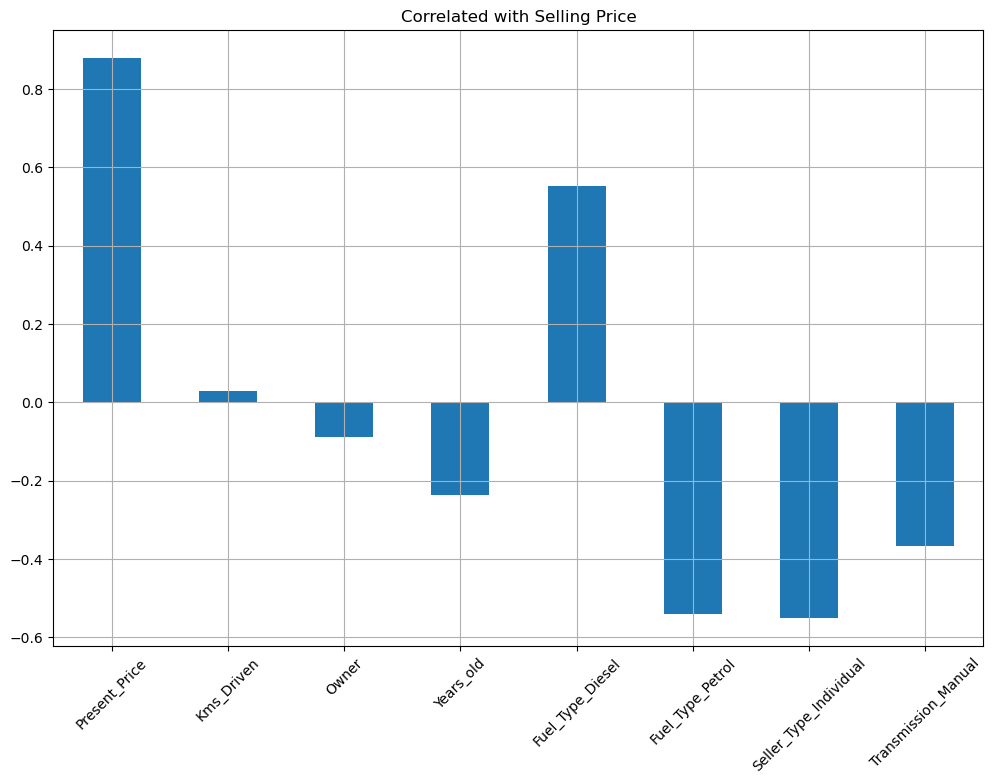

In [22]:
df_2.corrwith(df.Selling_Price).plot.bar(figsize=(12,8), title='Correlated with Selling Price', grid=True, rot=45)
plt.show()

In [23]:
corr = df.corr()

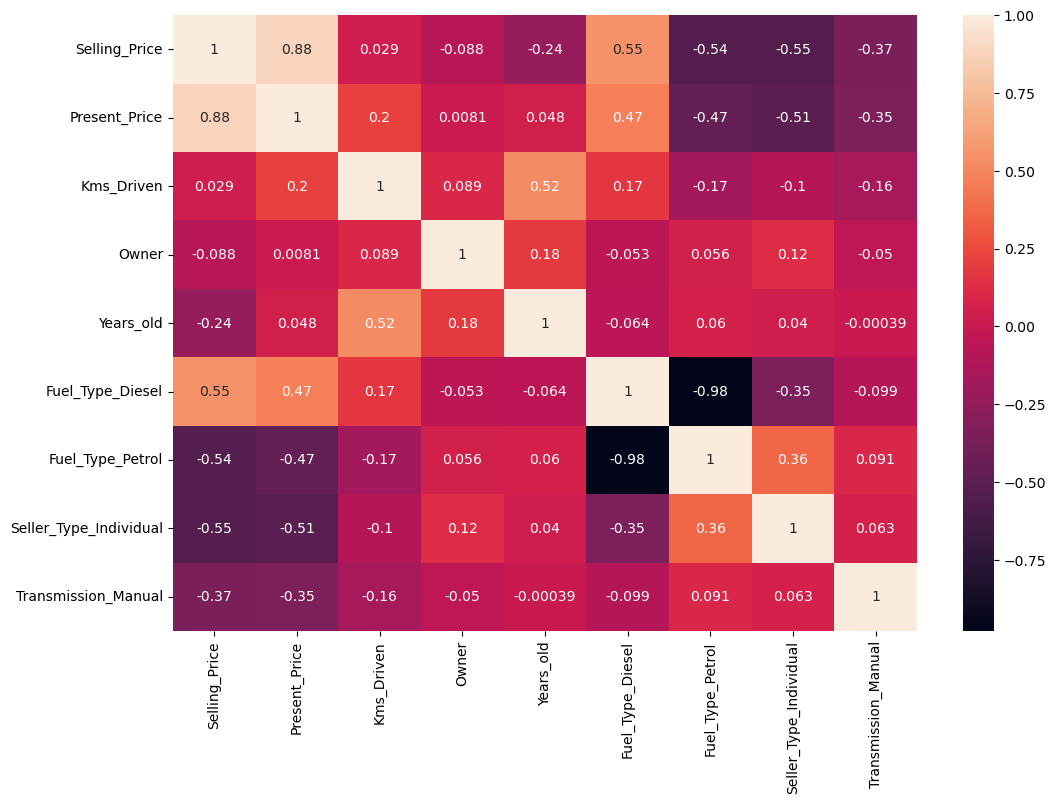

In [24]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, annot=True)
plt.show()

### Splitting the Dataset

In [25]:
x = df.drop(columns='Selling_Price')

In [26]:
y = df.Selling_Price

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [29]:
x_train.shape

(240, 8)

In [30]:
y_train.shape

(240,)

In [31]:
x_test.shape

(61, 8)

In [32]:
y_test.shape

(61,)

### Feature Scaling

#### Not applying in this case

## 2. Building ML Models

### 1) Multiple linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg_mlr = LinearRegression()
reg_mlr.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = reg_mlr.predict(x_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_pred)

0.914434297222852

### 2) Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = reg_rf.predict(x_test)

In [41]:
r2_score(y_test, y_pred)

0.9582565873731135

## 3. Hypermarameter tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['sqrt', 'log2', None]}

In [44]:
random_cv = RandomizedSearchCV(estimator = reg_rf, param_distributions = parameters, n_iter = 10, 
                               scoring= 'neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [45]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [46]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=30, max_features=None, n_estimators=400)

In [47]:
random_cv.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'squared_error'}

In [48]:
regressor = random_cv.best_estimator_
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)

0.9567024530956032

## 4. Final Model (Random Forest Regressor)

In [49]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
y_pred = regressor.predict(x_test)

In [51]:
r2_score(y_test, y_pred)

0.9532054796188993

In [52]:
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.0875844790251434

In [53]:
comp = pd.DataFrame(data ={"True_V": y_test, "Pred": y_pred})
comp

,True_V,Pred
223,8.25,6.8725
150,0.50,0.4644
226,5.25,4.5865
296,9.50,8.9295
52,18.00,15.0691
...,...,...
137,0.65,0.4650
227,2.55,2.4460
26,4.15,3.5235
106,1.35,2.5307


In [54]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

223    1.3775
150    0.0356
226    0.6635
296    0.5705
52     2.9309
        ...  
137    0.1850
227    0.1040
26     0.6265
106    1.1807
92     0.2875
Length: 61, dtype: float64

In [55]:
mae = ae.mean()
mae

0.6147639344262296

### Feature Importance

In [56]:
regressor.feature_importances_

array([8.84075573e-01, 2.75531894e-02, 7.76787889e-05, 6.87200119e-02,
       1.75173969e-03, 2.89488762e-03, 5.67305009e-03, 9.25386971e-03])

In [59]:
feature_imp = pd.Series(data=regressor.feature_importances_, index=x_train.columns)

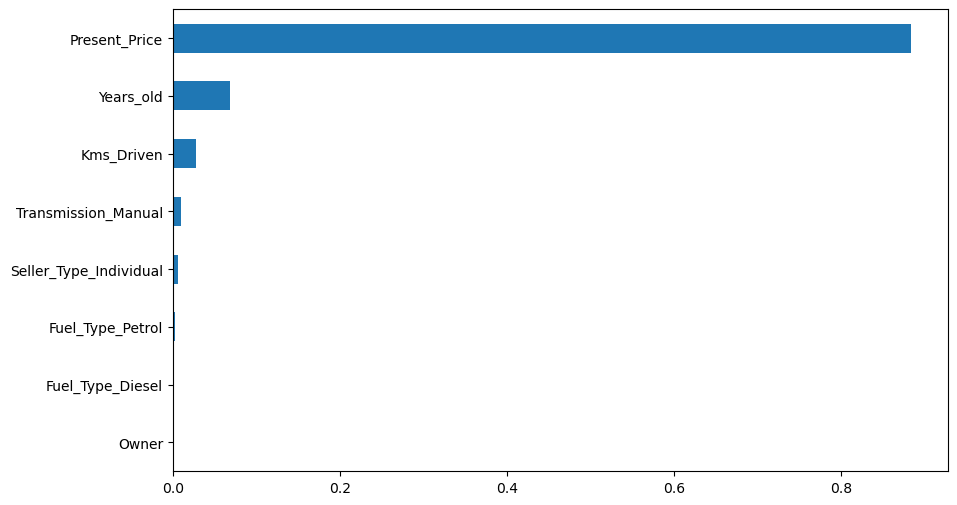

In [60]:
feature_imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.show()

In [79]:
imp_features = feature_imp.sort_values(ascending=False).head(2).index
imp_features

Index(['Present_Price', 'Years_old'], dtype='object')

In [80]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [81]:
df_imp = df[imp_features]
df_imp.head()

,Present_Price,Years_old
0,5.59,9
1,9.54,10
2,9.85,6
3,4.15,12
4,6.87,9


In [82]:
x_imp = df_imp
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=0)
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)

0.9612631169724313

In [86]:
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.9895274289818365

In [83]:
comp = pd.DataFrame(data ={"True_V": y_test, "Pred": y_pred})
comp

,True_V,Pred
223,8.25,6.546150
150,0.50,0.439900
226,5.25,4.793767
296,9.50,8.626100
52,18.00,15.773025
...,...,...
137,0.65,0.468400
227,2.55,2.415500
26,4.15,3.609833
106,1.35,2.556500


In [84]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

223    1.703850
150    0.060100
226    0.456233
296    0.873900
52     2.226975
         ...   
137    0.181600
227    0.134500
26     0.540167
106    1.206500
92     0.026167
Length: 61, dtype: float64

In [85]:
mae = ae.mean()
mae

0.6341554029758949

## 5. Predicting single observation

In [96]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [94]:
single_obs = df_imp.loc[0]
single_obs

Present_Price    5.59
Years_old        9.00
Name: 0, dtype: float64

In [95]:
regressor.predict([single_obs])

/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.77173214])

In [98]:
single_obs_2 = df_imp.loc[1]
single_obs_2

Present_Price     9.54
Years_old        10.00
Name: 1, dtype: float64

In [99]:
regressor.predict([single_obs_2])

/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.18066667])